In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

## Suffix
### Indicates which set of results to view

In [2]:
suffix = 'SSRTscale-5'

# SSRT by SSD

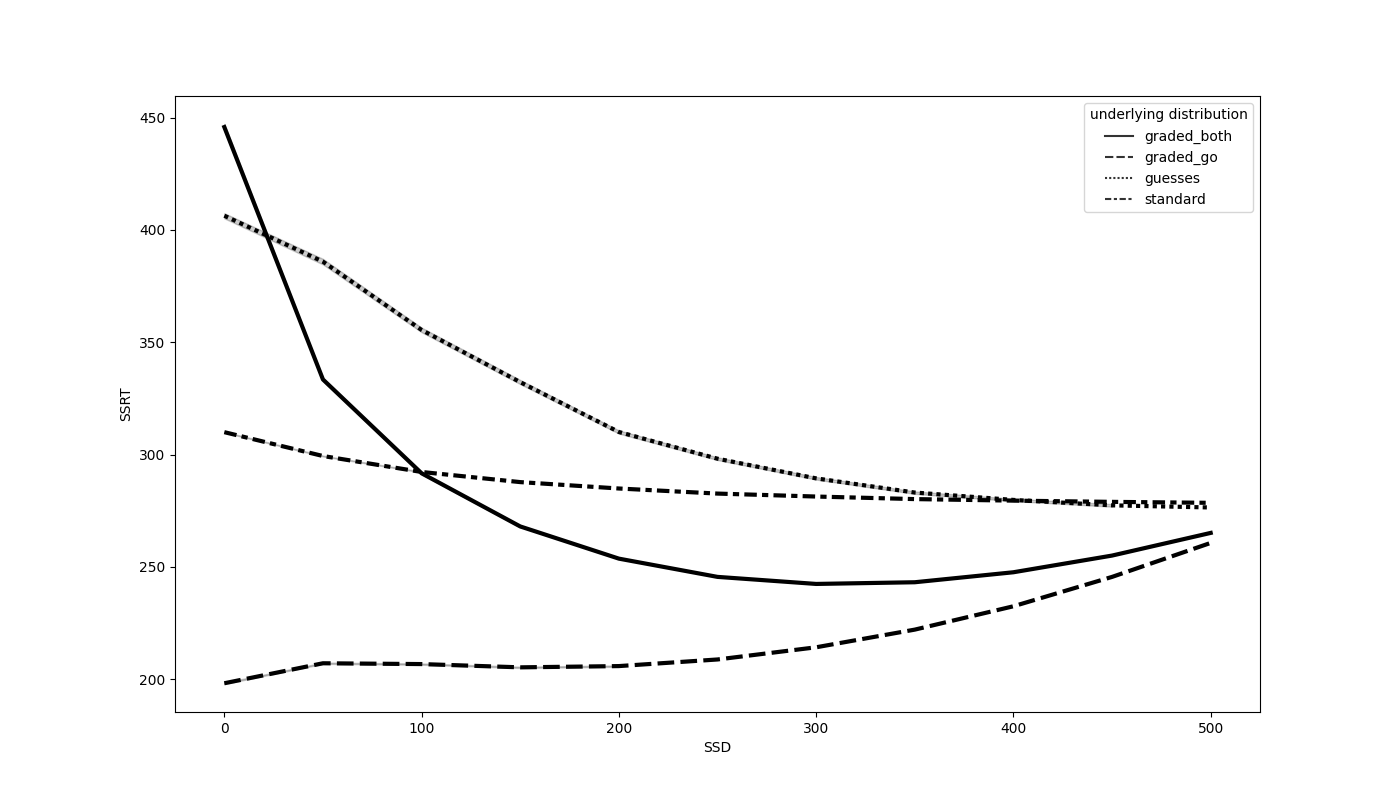

In [3]:
Image('figures/%s/SSRT_by_SSD.png' % suffix)

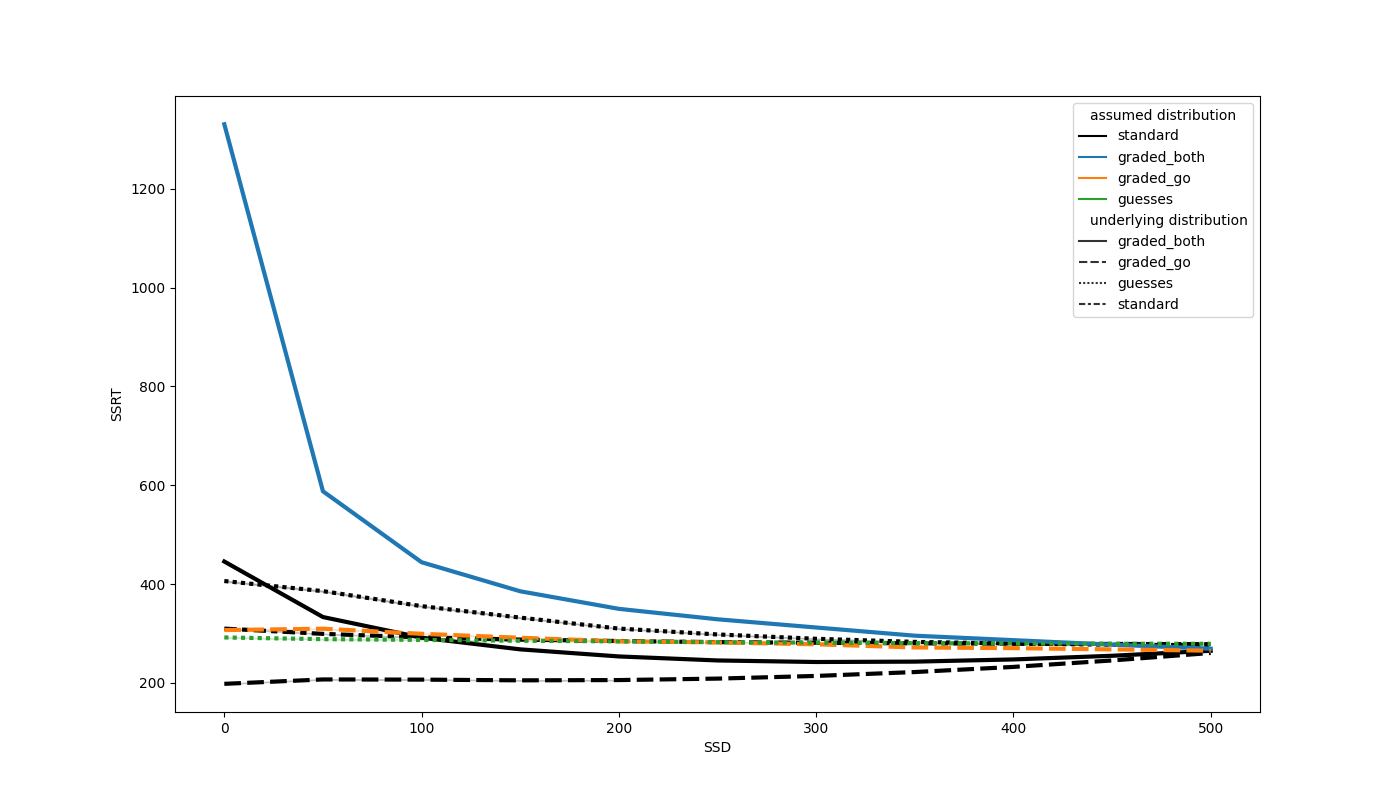

In [4]:
Image('figures/%s/SSRT_by_SSD_supplement.png' % suffix)

# Inhibition Function

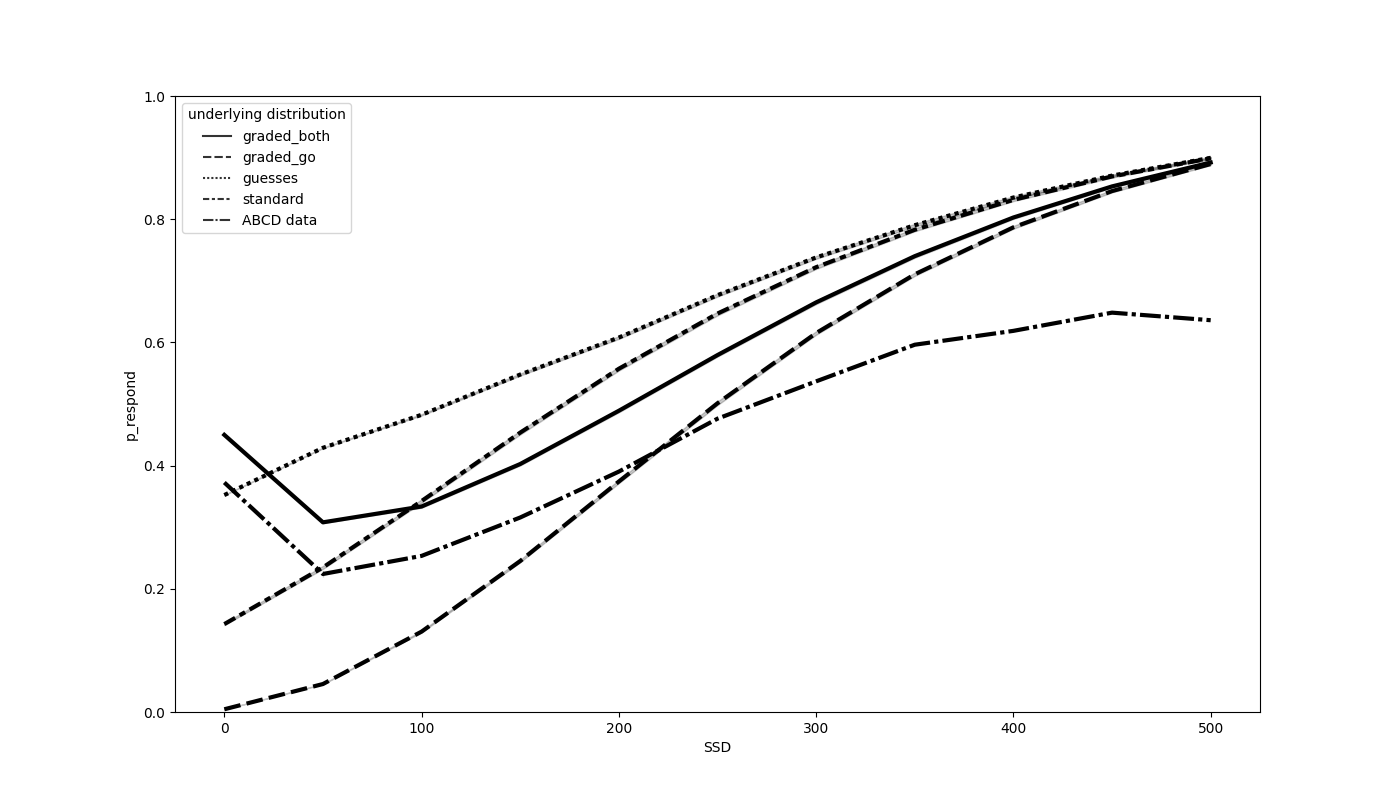

In [5]:
Image('figures/%s/inhibition_function.png' % suffix)

# Individual Differences

In [6]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [7]:
ssrt_df = pd.read_csv('ssrt_metrics/expected_ssrts_%s.csv' % suffix, index_col=0)

# reformatting - was multiindex
ssrt_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(ssrt_df.loc['underlying distribution', :].values, ssrt_df.columns)]
ssrt_df = ssrt_df.drop(['underlying distribution', 'NARGUID'])

for col in ssrt_df.columns:
    ssrt_df[col] = ssrt_df[col].astype(float)
    
# confirm that no kludge is required - check SSRTscale-0_RTscale-0 for use of kludge
tracking_ssrts = ['gen-graded_both_SSRT-tracking', 'gen-graded_go_SSRT-tracking.1','gen-guesses_SSRT-tracking.2', 'gen-standard_SSRT-tracking.3']
for col in tracking_ssrts:
    assert sum(ssrt_df[col].isnull())==0


In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus_%s.json' % suffix
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,678.847492,0.159021,305.691740,0.391096
007W6H7B,457.038672,0.245677,295.696698,0.407006
00CY2MDM,523.996572,0.210972,303.123996,0.395063
00HEV6HB,676.134241,0.159710,296.196275,0.406180
00J52GPG,529.648552,0.208486,302.394802,0.396205


In [10]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), ssrt_df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [11]:
monster_df.shape

(8238, 28)

In [12]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

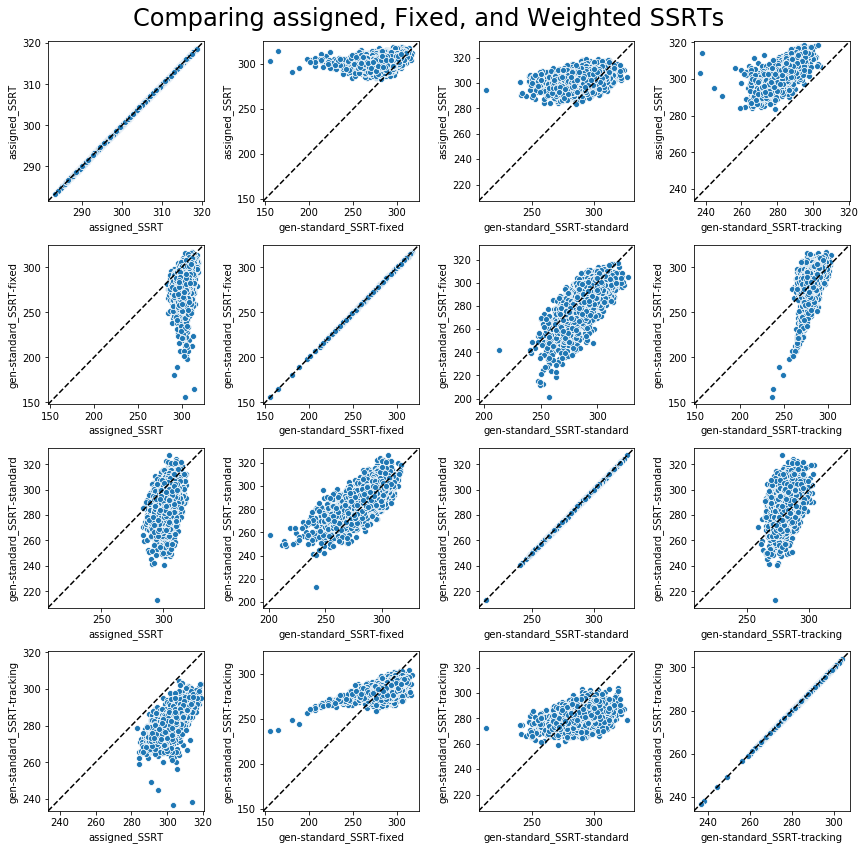

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard', 'gen-standard_SSRT-tracking']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [14]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard,gen-standard_SSRT-tracking
assigned_SSRT,1.000000,0.353220,0.401792,0.725778
gen-standard_SSRT-fixed,0.353220,1.000000,0.687045,0.395416
gen-standard_SSRT-standard,0.401792,0.687045,1.000000,0.381795
gen-standard_SSRT-tracking,0.725778,0.395416,0.381795,1.000000


# Comparing Fixed SSRTs

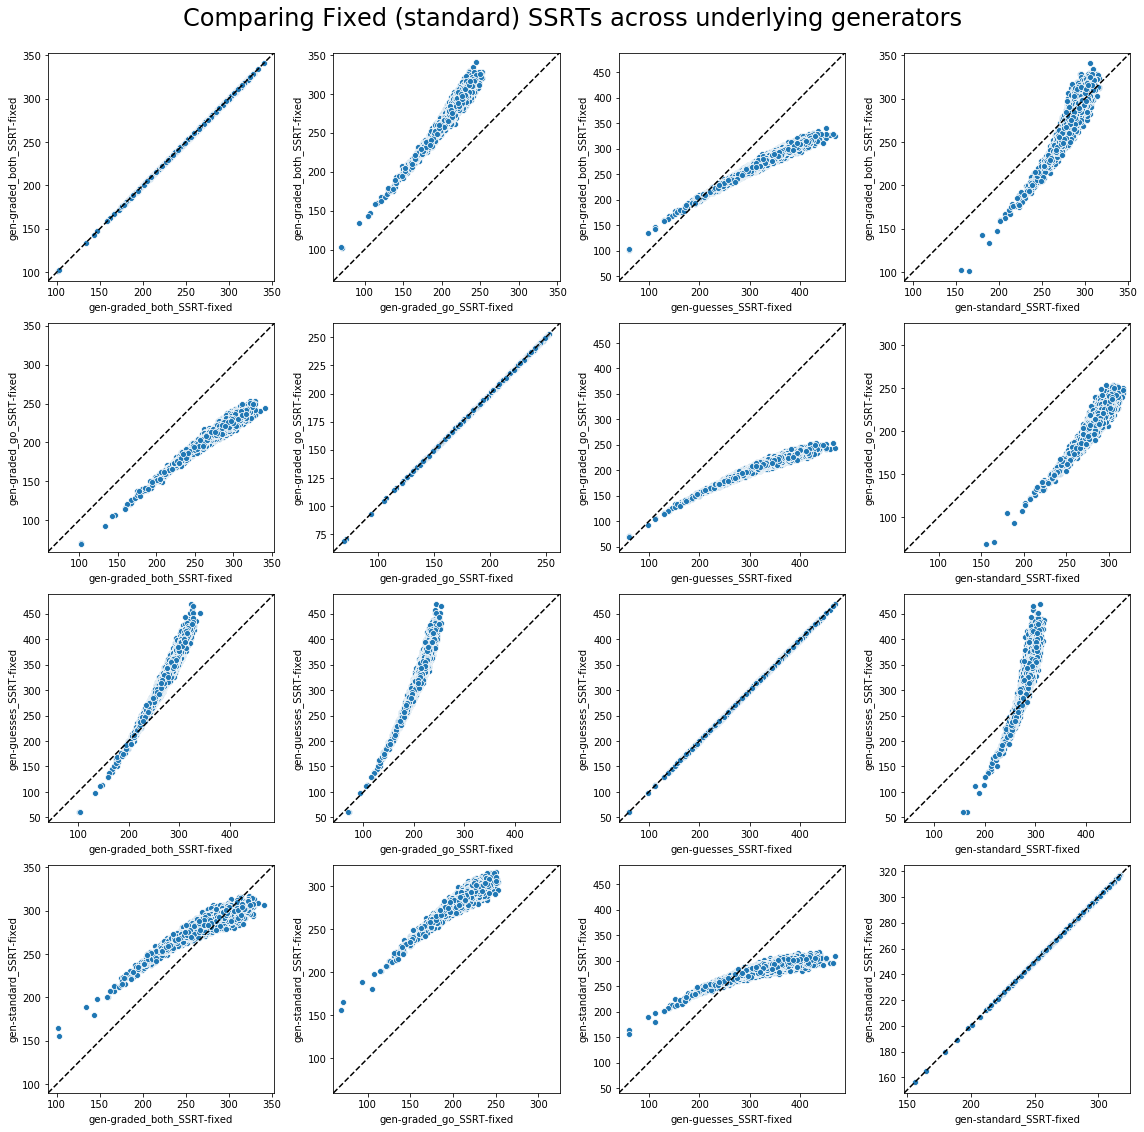

In [15]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [16]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,0.961454,0.975825,0.892868
gen-graded_go_SSRT-fixed,0.961454,1.000000,0.968315,0.887588
gen-guesses_SSRT-fixed,0.975825,0.968315,1.000000,0.879787
gen-standard_SSRT-fixed,0.892868,0.887588,0.879787,1.000000


## (not rescaling the axes to get a closer look)

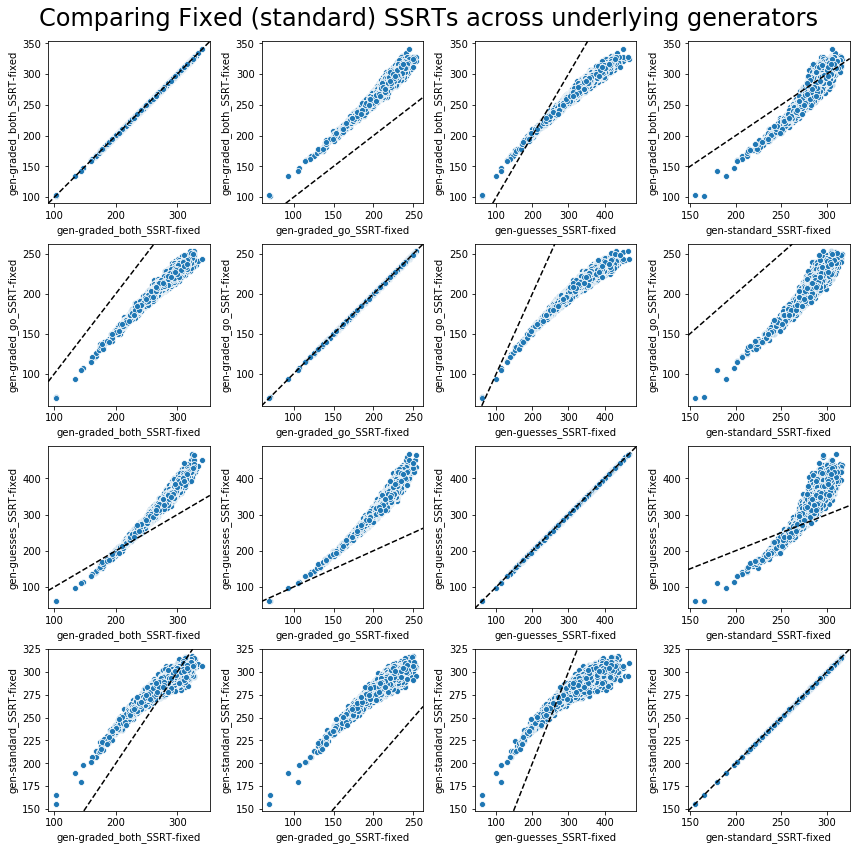

In [17]:
curr_df = monster_df.filter(regex='fixed')
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Weighted SSRTs (from randomly assigned SSD distributions)

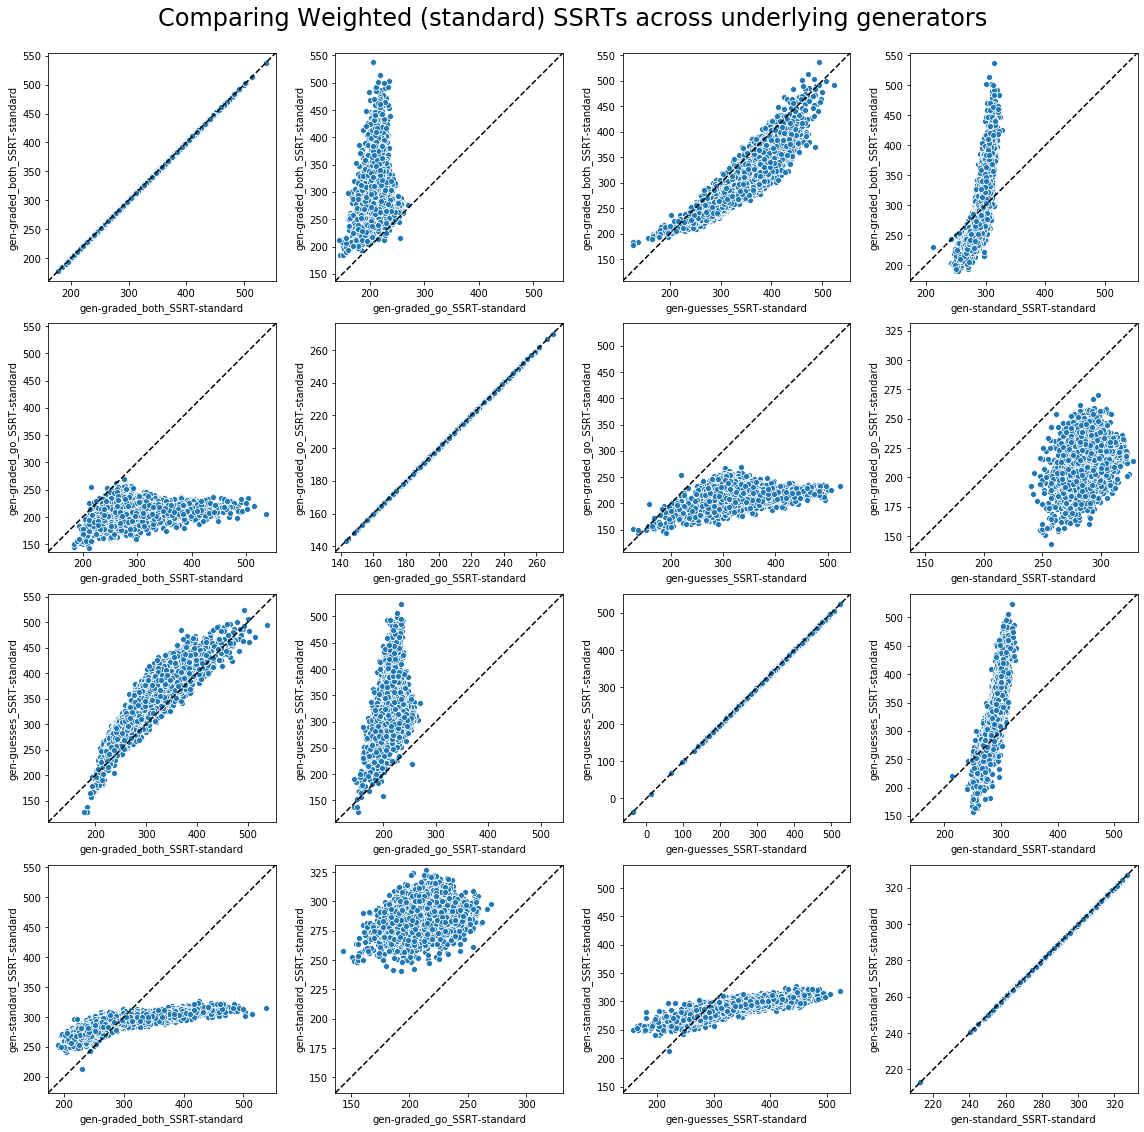

In [18]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [19]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,0.102271,0.918044,0.819514
gen-graded_go_SSRT-standard,0.102271,1.000000,0.214392,0.179191
gen-guesses_SSRT-standard,0.918044,0.214392,1.000000,0.812286
gen-standard_SSRT-standard,0.819514,0.179191,0.812286,1.000000


## not rescaling axis to get a closer look

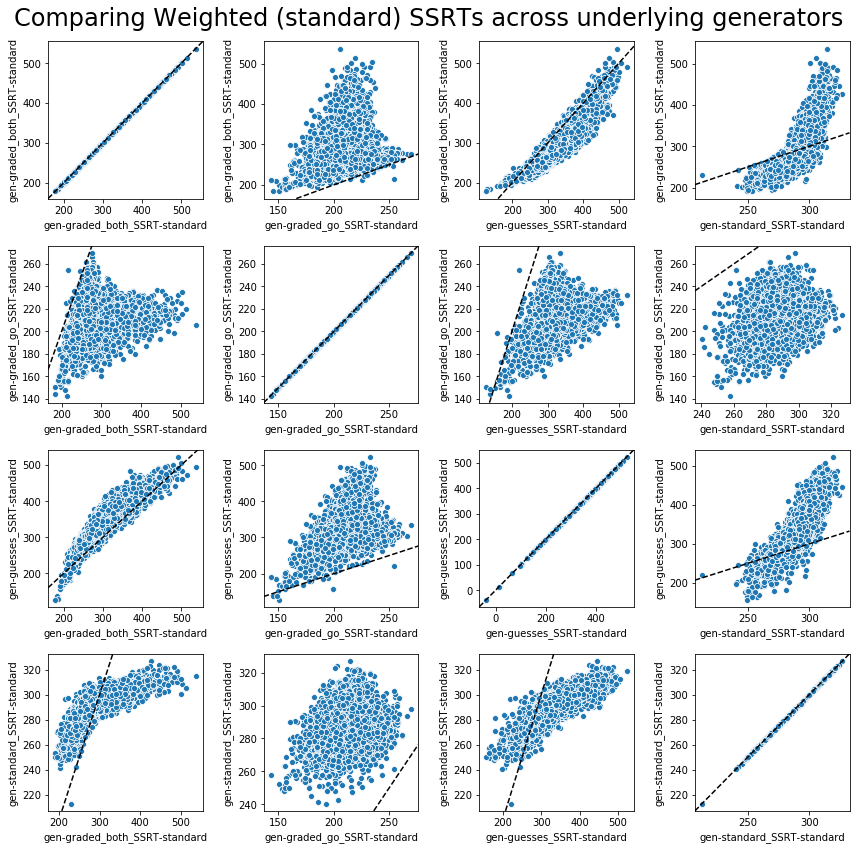

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Tracking-based SSRTs

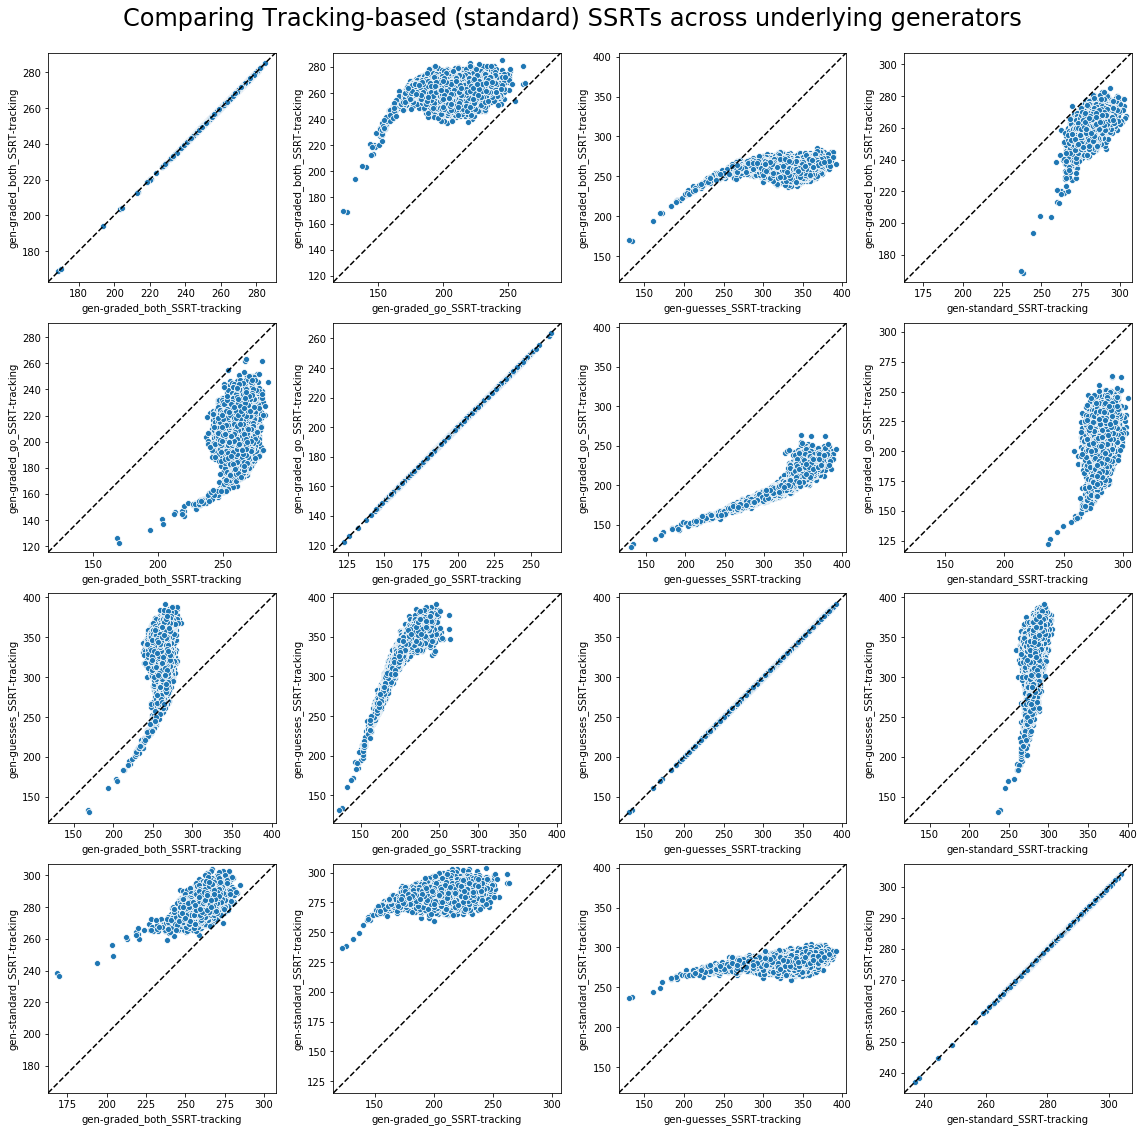

In [21]:
curr_df = monster_df.filter(regex='SSRT-tracking')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [22]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
gen-graded_both_SSRT-tracking,1.000000,0.042398,0.100644,0.554049
gen-graded_go_SSRT-tracking,0.042398,1.000000,0.925120,0.270114
gen-guesses_SSRT-tracking,0.100644,0.925120,1.000000,0.342385
gen-standard_SSRT-tracking,0.554049,0.270114,0.342385,1.000000


## not rescaling axes

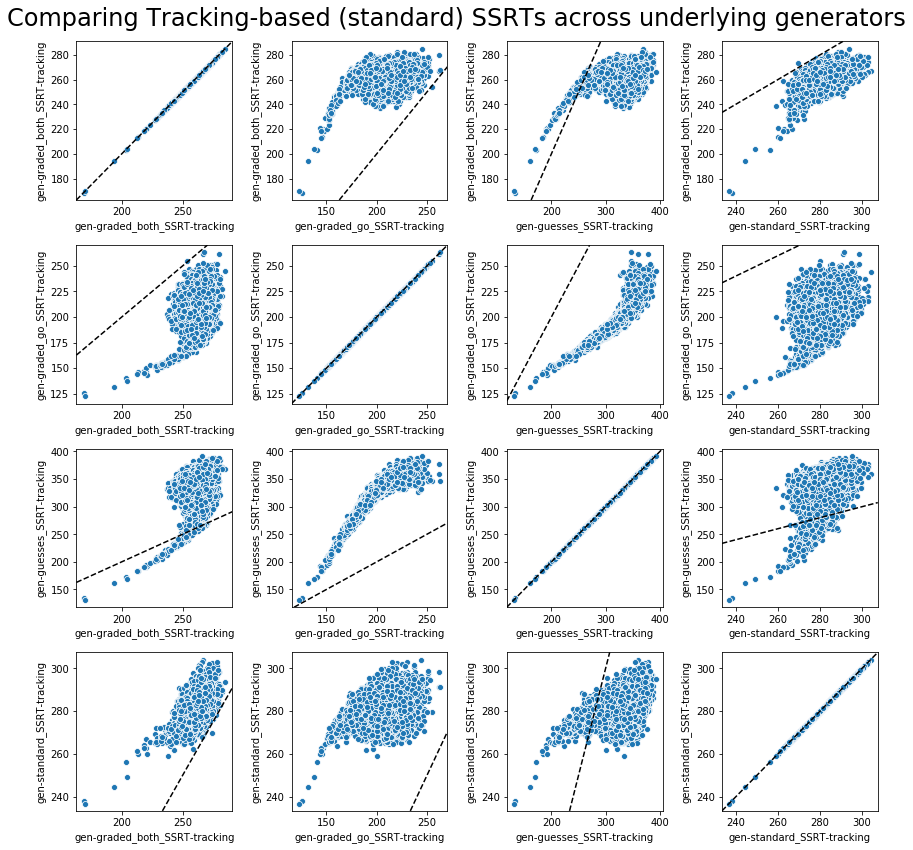

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [24]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed',
             'gen-graded_both_SSRT-tracking',
             'gen-graded_go_SSRT-tracking',
             'gen-guesses_SSRT-tracking',
             'gen-standard_SSRT-tracking']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
count,8238.000000,8206.000000,8209.000000,8237.000000,8196.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,301.315917,278.100020,213.752135,320.578934,287.376642,276.509347,211.962248,332.993566,285.199077,260.556956,205.946590,334.876917,281.461828
std,5.047251,42.374181,15.172537,45.657904,10.303266,22.629302,16.928580,43.041688,12.539507,6.976813,16.367441,27.828528,5.780513
min,283.372821,178.200000,143.066667,-36.683333,212.833333,102.000000,69.000000,61.000000,156.000000,168.630000,122.360000,130.828000,236.864000
25%,297.979993,251.733333,204.566667,292.950000,281.023558,264.000000,203.000000,308.000000,279.000000,256.285500,195.592000,322.248500,277.678500
50%,301.320540,266.046277,214.050000,313.200000,287.208333,280.000000,214.000000,337.000000,287.000000,260.807000,206.603000,341.440000,281.440000
75%,304.687636,292.212500,223.716667,344.566667,293.900000,292.000000,223.000000,362.000000,293.000000,265.146000,217.145000,353.997500,285.268000
max,318.631766,537.150000,269.976190,523.183333,327.050000,341.000000,253.000000,468.000000,317.000000,285.022000,263.348000,391.908000,304.038000


In [25]:
ssrt_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,...,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
gen-graded_both_SSRT-standard,1.000000,0.102271,0.918044,0.819514,0.138845,-0.789308,0.613787,-0.851210,0.675929,0.425155,...,0.724403,0.433256,0.576363,0.558564,0.561900,0.540864,0.047666,0.560795,0.548667,0.177227
gen-graded_go_SSRT-standard.1,0.102271,1.000000,0.214392,0.179191,-0.218681,0.415079,0.263796,-0.112458,-0.478572,-0.178445,...,-0.410145,-0.663521,0.723335,0.746703,0.725819,0.681964,0.072306,0.715526,0.705527,0.248063
gen-guesses_SSRT-standard.2,0.918044,0.214392,1.000000,0.812286,-0.154174,-0.745766,0.676985,-0.928553,0.551521,0.351756,...,0.634598,0.298045,0.716607,0.713320,0.727794,0.674501,0.020390,0.714339,0.695235,0.194517
gen-standard_SSRT-standard.3,0.819514,0.179191,0.812286,1.000000,0.106795,-0.611778,0.702870,-0.611825,0.526472,0.424778,...,0.582296,0.352975,0.564721,0.563715,0.542130,0.687045,0.252984,0.568065,0.594999,0.381795
gen-graded_both_SSRT-guesses,0.138845,-0.218681,-0.154174,0.106795,1.000000,-0.008041,0.081203,0.234860,0.289504,0.217190,...,0.192026,0.359698,-0.326611,-0.344837,-0.376297,-0.244557,0.203887,-0.340539,-0.288522,0.119979
gen-graded_go_SSRT-guesses.1,-0.789308,0.415079,-0.745766,-0.611778,-0.008041,1.000000,-0.377356,0.774278,-0.853480,-0.457992,...,-0.886299,-0.724109,-0.174266,-0.164750,-0.180369,-0.148469,0.042418,-0.175798,-0.151431,0.020085
gen-guesses_SSRT-guesses.2,0.613787,0.263796,0.676985,0.702870,0.081203,-0.377356,1.000000,-0.435639,0.329681,0.374350,...,0.391180,0.199508,0.527803,0.531234,0.522763,0.603965,0.370208,0.535084,0.585337,0.487537
gen-standard_SSRT-guesses.3,-0.851210,-0.112458,-0.928553,-0.611825,0.234860,0.774278,-0.435639,1.000000,-0.546693,-0.266777,...,-0.624733,-0.290132,-0.613680,-0.608626,-0.635289,-0.501566,0.176557,-0.606911,-0.562843,0.014085
gen-graded_both_SSRT-graded_go,0.675929,-0.478572,0.551521,0.526472,0.289504,-0.853480,0.329681,-0.546693,1.000000,0.705633,...,0.981196,0.920872,-0.020654,-0.021051,-0.027633,0.000083,0.062340,-0.016727,-0.015023,0.029176
gen-graded_go_SSRT-graded_go.1,0.425155,-0.178445,0.351756,0.424778,0.217190,-0.457992,0.374350,-0.266777,0.705633,1.000000,...,0.724899,0.735133,0.047240,0.060712,0.025867,0.111412,0.262537,0.054739,0.080983,0.234070


## How many subs survived (i.e. didn't have non-null SSRTs)

This can occur during the weighted method if one of their SSD-specific SSRTs is null. Not sure if you want me to fix.

In [26]:
monster_df.columns

options = ['standard', 'guesses', 'graded_go', 'graded_both']

for gen_str in options:
    for ssrt_str in options:
        col = 'gen-%s_SSRT-%s' % (gen_str, ssrt_str)
        print(col, len(monster_df.loc[monster_df[col].notnull()]))

gen-standard_SSRT-standard 8196
gen-standard_SSRT-guesses 8196
gen-standard_SSRT-graded_go 8196
gen-standard_SSRT-graded_both 8196
gen-guesses_SSRT-standard 8237
gen-guesses_SSRT-guesses 8237
gen-guesses_SSRT-graded_go 8237
gen-guesses_SSRT-graded_both 8237
gen-graded_go_SSRT-standard 8209
gen-graded_go_SSRT-guesses 8209
gen-graded_go_SSRT-graded_go 8209
gen-graded_go_SSRT-graded_both 8209
gen-graded_both_SSRT-standard 8206
gen-graded_both_SSRT-guesses 8206
gen-graded_both_SSRT-graded_go 8206
gen-graded_both_SSRT-graded_both 8206


In [27]:
ssrt_df.filter(regex='SSRT-tracking').describe()

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
count,8238.000000,8238.000000,8238.000000,8238.000000
mean,260.556956,205.946590,334.876917,281.461828
std,6.976813,16.367441,27.828528,5.780513
min,168.630000,122.360000,130.828000,236.864000
25%,256.285500,195.592000,322.248500,277.678500
50%,260.807000,206.603000,341.440000,281.440000
75%,265.146000,217.145000,353.997500,285.268000
max,285.022000,263.348000,391.908000,304.038000


# Plot graded Mu Go function

In [28]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


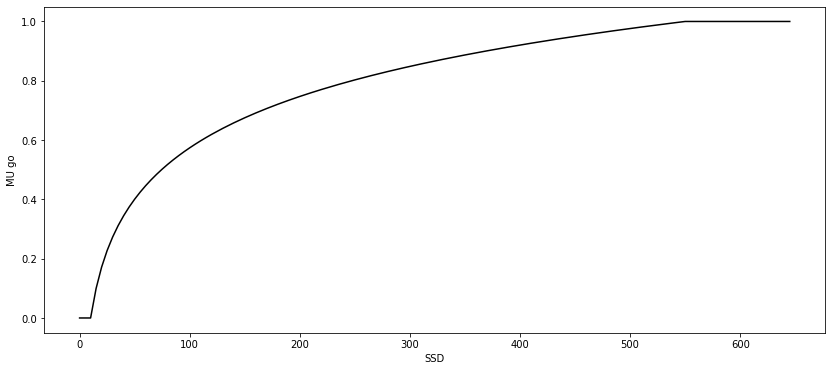

In [29]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')